In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('Reddit_Encoded.csv')
df

,comment,hate_speech,lemmatized_comment,document_vector_flat
0,subsection retarded hungarians ohh boy brace l...,1,subsection retard hungarians ohh boy brace liv...,"0.014043219,-0.01809359,0.017145459,0.08062436..."
1,hiii just got work Foundation and grounding ma...,0,hiii just get work Foundation and ground mainl...,"-0.0030388932,-0.035133556,0.020659983,0.07383..."
2,wow guess soyboys every country,0,wow guess soyboys every country,"0.017362628,0.005587179,0.0297773,0.109146975,..."
3,owen benjamins soyboy song goes every country ...,0,owen benjamins soyboy song go every country amaze,"0.018085241,0.0011954829,2.8959475e-05,0.07601..."
4,yall hear sumn means live small town rn for w...,0,yall hear sumn mean live small town rn for wor...,"0.023993038,-0.00060867134,0.005239945,0.05989..."
...,...,...,...,...
22206,op stop faggot post videos next time hard,1,op stop faggot post videos next time hard,"0.08339707,-0.017676119,-0.036872935,0.1038081..."
22207,minute long video top hate champagne goes need...,0,minute long video top hate champagne go need g...,"0.009342635,0.02728245,-0.0013451587,0.0765217..."
22208,clue whos ecelebs are point time need get alo...,1,clue whos ecelebs be point time need get along...,"-0.0006810841,0.008315975,0.029024707,0.077029..."
22209,didn’t insult you insult me,0,didn ’ t insult you insult me,"0.06474433,-0.17082486,-0.029483724,0.04382453..."


In [21]:
df['fasttext_vector'] = df['document_vector_flat'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
X = np.vstack(df['fasttext_vector'].values)
y=df['hate_speech']

#### Splitting the Dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

#### Applying SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote=SMOTE(sampling_strategy='minority',random_state=42)

In [26]:
X_sm,y_sm = smote.fit_resample(X_train,y_train)
y_sm.value_counts()

0    13539
1    13539
Name: hate_speech, dtype: int64

In [27]:
X = tf.cast(tf.constant(X_sm),dtype=tf.float32)
y = tf.cast(tf.constant(y_sm),dtype=tf.float32)
X = tf.expand_dims(X, axis=0)
y = tf.expand_dims(y, axis=0)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Define the model
def create_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    return model

In [38]:
model = create_model()

In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7735 - loss: 0.5218 - val_accuracy: 0.8152 - val_loss: 0.4126
Epoch 2/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.8220 - loss: 0.3976 - val_accuracy: 0.8368 - val_loss: 0.3824
Epoch 3/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.8365 - loss: 0.3829 - val_accuracy: 0.8429 - val_loss: 0.3696
Epoch 4/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.8424 - loss: 0.3704 - val_accuracy: 0.8517 - val_loss: 0.3600
Epoch 5/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8540 - loss: 0.3521 - val_accuracy: 0.8557 - val_loss: 0.3557
Epoch 6/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8510 - loss: 0.3527 - val_accuracy: 0.8578 - val_loss: 0.3497
Epoch 7/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8537 - loss: 0.3428 - val_accuracy: 0.8623 - val_loss: 0.3455
Epoch 8/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8650 - loss: 0.3303 - val_accura

In [42]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8644 - loss: 0.3396
Test Accuracy: 0.8636


In [44]:
# Predict probabilities for test set
y_pred_probs = model.predict(X_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


In [81]:
# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int)

In [82]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8636


In [83]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3279  107]
 [ 499  558]]


In [49]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3386
           1       0.84      0.53      0.65      1057

    accuracy                           0.86      4443
   macro avg       0.85      0.75      0.78      4443
weighted avg       0.86      0.86      0.85      4443



[]

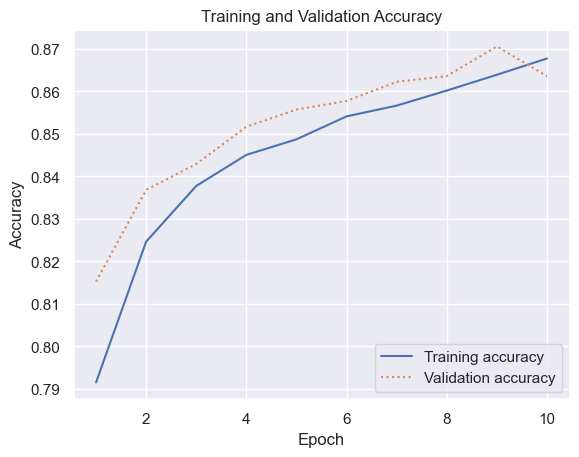

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()